In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical

In [31]:
train_df = pd.read_csv("training_twitter_x_y_train.csv")
train_df

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)
5,569677636613439488,negative,United,NaN,bobgiolito,NaN,0,@united Why did you load us in this flying sar...,NaN,2015-02-22 17:58:27 -0800,"Los Angeles, CA",Pacific Time (US & Canada)
6,569658903044218880,negative,Delta,NaN,aaronkinnari,NaN,0,@JetBlue that is a stock response. Delays not ...,NaN,2015-02-22 16:44:00 -0800,Gotham,Quito
7,568542766860541952,positive,Delta,NaN,TimothySays,NaN,0,@JetBlue That'd be nice! Hoping to rack up eno...,NaN,2015-02-19 14:48:53 -0800,"Burlington, MA",Eastern Time (US & Canada)
8,570116209263427584,negative,United,NaN,lindaSWC,NaN,1,@united frankly worse customer service ever. P...,NaN,2015-02-23 23:01:11 -0800,NaN,NaN
9,568870144891600896,positive,Southwest,NaN,amyums,NaN,0,@SouthwestAir yeah haha. Never been in one. It...,NaN,2015-02-20 12:29:46 -0800,NaN,Central Time (US & Canada)


In [4]:
def num_senti(s):
    if s == "negative" :
        return 0
    elif s == "neutral" :
        return 1
    else:
        return 2
def num_to_sent(s):
    if s == 0 :
        return "negative"
    elif s == 1 :
        return "neutral"
    else:
        return "positive"


In [6]:
tweets = train_df["text"].values

In [7]:
def split_attached_words_remove_punct(tweets) :
    clean_tweets = []
    import re
    import string
    printable = set(string.ascii_letters + string.whitespace)
    for tweet in tweets :
        new_tweet = []
        for word in tweet:
            clean_word = re.sub("[0-9]+", '', word)
            clean_word = re.sub("\s+", " ", clean_word)
            content = [c for c in clean_word if c in printable]
            clean_word = "".join(content)
            new_tweet.append(clean_word)
        clean_tweets.append(" ".join(new_tweet))
    return clean_tweets
        
def remove_stop_words(tweets, stops) :
    from nltk import word_tokenize
    clean_tweets = []
    for tweet in tweets :
        new_tweet = []
        for word in word_tokenize(tweet):
            if word.lower() not in stops :            
                new_tweet.append(word)
        clean_tweets.append(" ".join(new_tweet))
    return clean_tweets
        
import string
from nltk.corpus import stopwords
stops = list(stopwords.words('english'))
stops += (list(string.punctuation))
stops


def remove_hrefs(tweets) :
    clean_tweets = []
    import re
    for tweet in tweets :
        new_tweet = []
        for word in tweet.split():
            #if not (word.startswith("http://") or word.startswith("https://")):
            word = re.sub("[^A-Za-z ]", ' ', word)
            word = re.sub("\s+", " ", word)
            new_tweet.append(word)
            #else:
            #    print("found", word)
        clean_tweets.append(" ".join(new_tweet))
    return clean_tweets
def lower(tweets) :
    clean_tweets = []
    for tweet in tweets :
        clean_tweets.append(tweet.lower())
    return clean_tweets

In [8]:
hrefs_removed = remove_hrefs(tweets)
#print(hrefs_removed)
stop_words_removed = remove_stop_words(hrefs_removed, stops)
#print(stop_words_removed)

In [9]:
final_train_tweets = lower(stop_words_removed)

In [32]:
test_df = pd.read_csv("test_twitter_x_test.csv")
test_df

,tweet_id,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569682010270101504,American,NaN,zsalim03,NaN,0,@AmericanAir In car gng to DFW. Pulled over 1h...,NaN,2015-02-22 18:15:50 -0800,Texas,Central Time (US & Canada)
1,569608307184242688,American,NaN,sa_craig,NaN,0,"@AmericanAir after all, the plane didn’t land ...",NaN,2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada)
2,567879304593408001,Southwest,NaN,DanaChristos,NaN,1,@SouthwestAir can't believe how many paying cu...,NaN,2015-02-17 18:52:31 -0800,CT,Eastern Time (US & Canada)
3,569757651539660801,US Airways,NaN,rossj987,NaN,0,@USAirways I can legitimately say that I would...,NaN,2015-02-22 23:16:24 -0800,"Washington, D.C.",Eastern Time (US & Canada)
4,569900705852608513,American,NaN,tranpham18,NaN,0,@AmericanAir still no response from AA. great ...,NaN,2015-02-23 08:44:51 -0800,New York City,Eastern Time (US & Canada)
5,569235062862036992,United,NaN,setfive,NaN,0,@united we have developers flying down tmrw mo...,NaN,2015-02-21 12:39:49 -0800,"Central Sq. Cambridge, MA",Eastern Time (US & Canada)
6,569824422279950336,US Airways,NaN,earthXplorer,NaN,1,@USAirways hello??? Anyone there?,NaN,2015-02-23 03:41:43 -0800,"Miami, Fl. USA",Eastern Time (US & Canada)
7,567880416201293824,US Airways,NaN,AliNHamdani,NaN,0,@USAirways @husainhaqqani Mr. Husain u shld pr...,NaN,2015-02-17 18:56:56 -0800,Islamabad,Islamabad
8,570021943899877377,US Airways,NaN,BradleyPollock,NaN,0,"@USAirways not likely, flightaware says plane ...",NaN,2015-02-23 16:46:36 -0800,NaN,NaN
9,569690664029462529,American,NaN,kaps12,NaN,0,@AmericanAir they don't even give an option to...,NaN,2015-02-22 18:50:13 -0800,NaN,NaN


In [11]:
test_tweets = test_df["text"].values

In [12]:
hrefs_removed = remove_hrefs(test_tweets)
stop_words_removed = remove_stop_words(hrefs_removed, stops)

In [13]:
final_test_tweets = lower(stop_words_removed)

In [18]:
del train_df, test_df, hrefs_removed, stop_words_removed, tweets, test_tweets
len(final_train_tweets[0]), len(final_test_tweets[0])

(88, 82)

In [66]:
tfidf = TfidfVectorizer(min_df = 0.0001, ngram_range=(1, 3))
X_train = tfidf.fit_transform(final_train_tweets).todense()
X_test = tfidf.transform(final_test_tweets).todense()
print(X_train.shape)
print(X_test.shape)

(10980, 18081)
(3660, 18081)


In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(10980, 18081)
(3660, 18081)


In [ ]:
"""
0.78 score
tfidf = TfidfVectorizer(max_df = 1.0, min_df = 0.0006, ngram_range=(1, 3))
(10980, 2891)
(3660, 2891)
"""

In [ ]:
#pca = PCA()
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

In [34]:
Y_train = np.array([num_senti(sentiment) for sentiment in train_df['airline_sentiment'].values])

In [ ]:
np.array(X_train_scaled).shape, Y_train.shape

In [ ]:
Y_train

In [35]:
Y_train = to_categorical(Y_train, num_classes=3)
Y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
# 0.73
# 0.67
# 0.753
# 0.71
# 0.72

In [106]:
def create_clf() :
    num_units = 200
    dropout_rate = 0.0
    model = Sequential()
    model.add(Dense(units=num_units, activation='tanh', input_dim = len(X_train_scaled[0])))
    #model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=num_units, activation='tanh'))
    #model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=num_units, activation='tanh'))
    #model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=num_units, activation='tanh'))
    #model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=num_units, activation='tanh'))
    #model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=num_units, activation='tanh'))
    #model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [107]:
best_clf = KerasClassifier(create_clf) #LogisticRegression(C = 0.0001, solver = 'sag', max_iter=1000, fit_intercept = True)

In [58]:
from tqdm import tqdm 

In [109]:
for i in (range(10)):
    best_clf.fit(X_train, Y_train, validation_split = 0.1, epochs=1, verbose=1, shuffle=True)
    print(best_clf.score(X_train, Y_train))
    Y_pred = best_clf.predict(X_test)
    Y_pred_txt = [num_to_sent(sent) for sent in Y_pred]
    np.savetxt("predictions_"+str(i+1)+"_.csv", Y_pred_txt, fmt = "%s")

Train on 9882 samples, validate on 1098 samples
Epoch 1/1


6752/9882 [===================>..........] - ETA: 26:57 - loss: 1.1881 - acc: 0.25 - ETA: 13:35 - loss: 1.1846 - acc: 0.31 - ETA: 9:11 - loss: 1.1707 - acc: 0.3021 - ETA: 6:57 - loss: 1.1724 - acc: 0.320 - ETA: 5:37 - loss: 1.1725 - acc: 0.350 - ETA: 4:44 - loss: 1.2020 - acc: 0.338 - ETA: 4:06 - loss: 1.2067 - acc: 0.357 - ETA: 3:38 - loss: 1.2011 - acc: 0.363 - ETA: 3:15 - loss: 1.1913 - acc: 0.368 - ETA: 2:58 - loss: 1.1888 - acc: 0.368 - ETA: 2:43 - loss: 1.1701 - acc: 0.380 - ETA: 2:31 - loss: 1.1608 - acc: 0.395 - ETA: 2:20 - loss: 1.1440 - acc: 0.413 - ETA: 2:12 - loss: 1.1416 - acc: 0.415 - ETA: 2:04 - loss: 1.1434 - acc: 0.418 - ETA: 1:57 - loss: 1.1474 - acc: 0.414 - ETA: 1:51 - loss: 1.1496 - acc: 0.417 - ETA: 1:46 - loss: 1.1472 - acc: 0.425 - ETA: 1:41 - loss: 1.1386 - acc: 0.440 - ETA: 1:37 - loss: 1.1425 - acc: 0.437 - ETA: 1:33 - loss: 1.1392 - acc: 0.437 - ETA: 1:29 - loss: 1.1370 - acc: 0.444 - ETA: 1:26 - loss: 1.1194 - acc: 0.459 - ETA: 1:23 - loss: 1.1138 - acc: 0.

10980/10980 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 6s 563us/step
0.7934426229508197
Train on 9882 samples, validate on 1098 samples
Epoch 1/1


6816/9882 [===================>..........] - ETA: 33:47 - loss: 1.1510 - acc: 0.25 - ETA: 17:02 - loss: 1.1868 - acc: 0.34 - ETA: 11:27 - loss: 1.2326 - acc: 0.33 - ETA: 8:41 - loss: 1.2280 - acc: 0.3359 - ETA: 7:00 - loss: 1.2406 - acc: 0.331 - ETA: 5:52 - loss: 1.2114 - acc: 0.343 - ETA: 5:04 - loss: 1.1936 - acc: 0.352 - ETA: 4:28 - loss: 1.1873 - acc: 0.355 - ETA: 4:01 - loss: 1.1733 - acc: 0.364 - ETA: 3:38 - loss: 1.1715 - acc: 0.371 - ETA: 3:20 - loss: 1.1595 - acc: 0.380 - ETA: 3:05 - loss: 1.1593 - acc: 0.380 - ETA: 2:52 - loss: 1.1642 - acc: 0.382 - ETA: 2:41 - loss: 1.1626 - acc: 0.383 - ETA: 2:31 - loss: 1.1651 - acc: 0.385 - ETA: 2:22 - loss: 1.1607 - acc: 0.386 - ETA: 2:15 - loss: 1.1582 - acc: 0.389 - ETA: 2:08 - loss: 1.1535 - acc: 0.399 - ETA: 2:02 - loss: 1.1524 - acc: 0.401 - ETA: 1:57 - loss: 1.1369 - acc: 0.415 - ETA: 1:52 - loss: 1.1315 - acc: 0.415 - ETA: 1:48 - loss: 1.1264 - acc: 0.417 - ETA: 1:44 - loss: 1.1292 - acc: 0.414 - ETA: 1:40 - loss: 1.1195 - acc: 0.

10980/10980 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 6s 529us/step
0.8041894353369763
Train on 9882 samples, validate on 1098 samples
Epoch 1/1


6816/9882 [===================>..........] - ETA: 33:26 - loss: 1.0945 - acc: 0.40 - ETA: 16:50 - loss: 1.1638 - acc: 0.31 - ETA: 11:19 - loss: 1.1980 - acc: 0.28 - ETA: 8:34 - loss: 1.2133 - acc: 0.3203 - ETA: 6:54 - loss: 1.1906 - acc: 0.343 - ETA: 5:48 - loss: 1.1666 - acc: 0.369 - ETA: 5:00 - loss: 1.1733 - acc: 0.357 - ETA: 4:24 - loss: 1.1810 - acc: 0.355 - ETA: 3:57 - loss: 1.1663 - acc: 0.361 - ETA: 3:35 - loss: 1.1622 - acc: 0.365 - ETA: 3:17 - loss: 1.1466 - acc: 0.377 - ETA: 3:01 - loss: 1.1364 - acc: 0.388 - ETA: 2:49 - loss: 1.1423 - acc: 0.384 - ETA: 2:38 - loss: 1.1291 - acc: 0.392 - ETA: 2:28 - loss: 1.1303 - acc: 0.395 - ETA: 2:20 - loss: 1.1413 - acc: 0.398 - ETA: 2:12 - loss: 1.1488 - acc: 0.395 - ETA: 2:06 - loss: 1.1450 - acc: 0.399 - ETA: 2:00 - loss: 1.1404 - acc: 0.404 - ETA: 1:54 - loss: 1.1287 - acc: 0.414 - ETA: 1:50 - loss: 1.1294 - acc: 0.416 - ETA: 1:45 - loss: 1.1246 - acc: 0.423 - ETA: 1:41 - loss: 1.1215 - acc: 0.425 - ETA: 1:38 - loss: 1.1209 - acc: 0.

10980/10980 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - E

6816/9882 [===================>..........] - ETA: 34:01 - loss: 1.2463 - acc: 0.28 - ETA: 17:09 - loss: 1.2783 - acc: 0.26 - ETA: 11:33 - loss: 1.2014 - acc: 0.31 - ETA: 8:45 - loss: 1.1567 - acc: 0.3438 - ETA: 7:03 - loss: 1.2155 - acc: 0.337 - ETA: 5:56 - loss: 1.2266 - acc: 0.343 - ETA: 5:07 - loss: 1.2329 - acc: 0.348 - ETA: 4:31 - loss: 1.2321 - acc: 0.351 - ETA: 4:02 - loss: 1.2167 - acc: 0.364 - ETA: 3:40 - loss: 1.2023 - acc: 0.375 - ETA: 3:21 - loss: 1.2113 - acc: 0.372 - ETA: 3:06 - loss: 1.1984 - acc: 0.382 - ETA: 2:52 - loss: 1.1857 - acc: 0.387 - ETA: 2:41 - loss: 1.1779 - acc: 0.388 - ETA: 2:31 - loss: 1.1710 - acc: 0.389 - ETA: 2:23 - loss: 1.1709 - acc: 0.388 - ETA: 2:16 - loss: 1.1621 - acc: 0.391 - ETA: 2:09 - loss: 1.1570 - acc: 0.395 - ETA: 2:03 - loss: 1.1465 - acc: 0.403 - ETA: 1:58 - loss: 1.1428 - acc: 0.406 - ETA: 1:53 - loss: 1.1425 - acc: 0.407 - ETA: 1:48 - loss: 1.1308 - acc: 0.419 - ETA: 1:44 - loss: 1.1250 - acc: 0.421 - ETA: 1:41 - loss: 1.1222 - acc: 0.

10980/10980 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 6s 588us/step
0.845719489981785
Train on 9882 samples, validate on 1098 samples
Epoch 1/1


KeyboardInterrupt: 

10980/10980 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 6s 565us/step


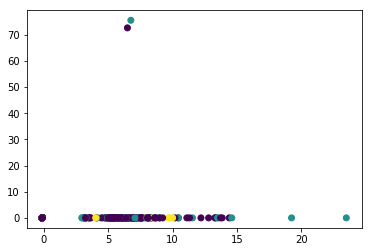

In [73]:
import matplotlib.pyplot as plt
Y_train_pred = best_clf.predict(X_train)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = Y_train_pred)
plt.show() 

In [78]:
Y_pred = best_clf.predict(X_test)
Y_pred_txt = [num_to_sent(sent) for sent in Y_pred]
np.savetxt("predictions.csv", Y_pred_txt, fmt = "%s")

In [ ]:
nb_clf = MultinomialNB(alpha = 0.01)
nb_clf.fit(X_train, Y_train)
print(nb_clf.score(X_train, Y_train))
Y_pred = nb_clf.predict(X_test)
Y_pred_txt = [num_to_sent(sent) for sent in Y_pred]
np.savetxt("nb_predictions.csv", Y_pred_txt, fmt = "%s")

In [46]:
best_clf.predict(X_test_scaled)

array([0, 0, 0, ..., 0, 2, 0])

In [47]:
Y_pred_txt

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'nega

In [ ]:
def make_grid (X, Y, h = 0.2) :
    x = np.arange(X.min() -1, X.max() + 1, h)
    y = np.arange(Y.min() -1, Y.max() + 1, h)
    x_grid, y_grid = np.meshgrid(x, y)
    return x_grid, y_grid

In [ ]:
x_grid, y_grid = make_grid(X_train_scaled[:, 1], X_train_scaled[:, 2], 1)

In [ ]:
size = len(x_grid)
print(size)
grid = np.c_[x_grid.reshape(-1), y_grid.reshape(-1)]
print(grid.shape)


In [ ]:
pred_grid = clf.predict(grid)

In [ ]:
Y_train_pred = clf.predict(X_train_scaled[:, :2])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(x_grid.reshape(-1), y_grid.reshape(-1), c = pred_grid)
plt.show()

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = Y_train_pred)
plt.show()